In [1]:
import kagglehub
import os
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

path = kagglehub.dataset_download("fuyadhasanbhoyan/knee-osteoarthritis-classification-224224")

classification_folder = os.path.join(path, 'Knee Osteoarthritis Classification')
train_path = os.path.join(classification_folder, 'train')
val_path = os.path.join(classification_folder, 'val')
test_path = os.path.join(classification_folder, 'test')

print(f"Train path: {train_path}")
print(f"Validation path: {val_path}")
print(f"Test path: {test_path}")





Train path: /kaggle/input/knee-osteoarthritis-classification-224224/Knee Osteoarthritis Classification/train
Validation path: /kaggle/input/knee-osteoarthritis-classification-224224/Knee Osteoarthritis Classification/val
Test path: /kaggle/input/knee-osteoarthritis-classification-224224/Knee Osteoarthritis Classification/test


In [2]:

train_datagen = ImageDataGenerator(
    rescale=1./255,
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 3780 images belonging to 3 classes.
Found 1080 images belonging to 3 classes.
Found 540 images belonging to 3 classes.


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 60s 353ms/step - accuracy: 0.3668 - loss: 1.3360 - val_accuracy: 0.4926 - val_loss: 1.0215 - learning_rate: 1.0000e-04
Epoch 2/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 12s 102ms/step - accuracy: 0.4611 - loss: 1.0501 - val_accuracy: 0.5676 - val_loss: 0.9731 - learning_rate: 1.0000e-04
Epoch 3/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 11s 94ms/step - accuracy: 0.4806 - loss: 1.0069 - val_accuracy: 0.5889 - val_loss: 0.9406 - learning_rate: 1.0000e-04
Epoch 4/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - accuracy: 0.5331 - loss: 0.9635 - val_accuracy: 0.5787 - val_loss: 0.9265 - learning_rate: 1.0000e-04
Epoch 5/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - accuracy: 0.5348 - loss: 0.9466 - val_accuracy: 0.5898 - val_loss: 0.9010 - learning_rate: 1.0000e-04
Epoch 6/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - accuracy: 0.5669 - loss: 0.9150 - val_accuracy: 0.6028 - val_loss: 0.8840 - learning_rate: 1.0000e-04
Epoch 7/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 10s

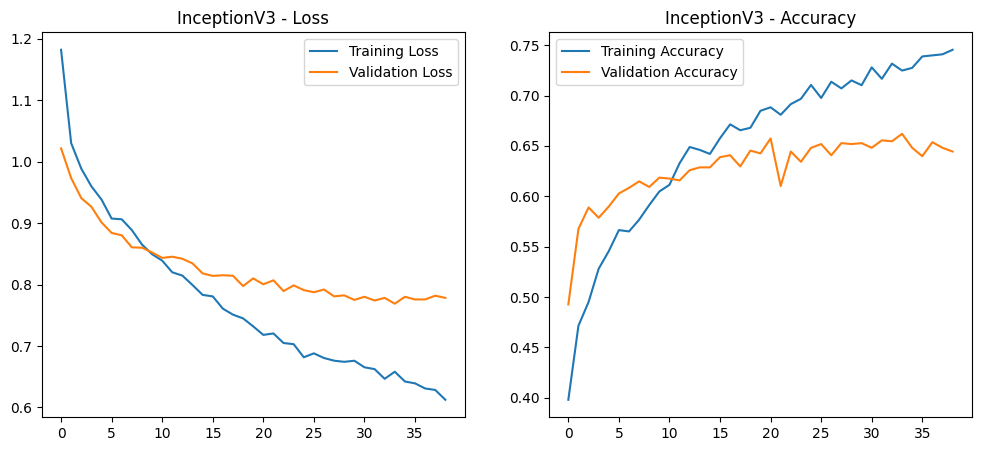

17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 545ms/step - accuracy: 0.6133 - loss: 0.7295
Test Accuracy: 0.73, Test Loss: 0.65
17/17 ━━━━━━━━━━━━━━━━━━━━ 12s 426ms/step
              precision    recall  f1-score   support

      Normal       0.84      0.59      0.69       180
  Osteopenia       0.74      0.86      0.79       180
Osteoporosis       0.65      0.73      0.69       180

    accuracy                           0.73       540
   macro avg       0.74      0.73      0.73       540
weighted avg       0.74      0.73      0.73       540



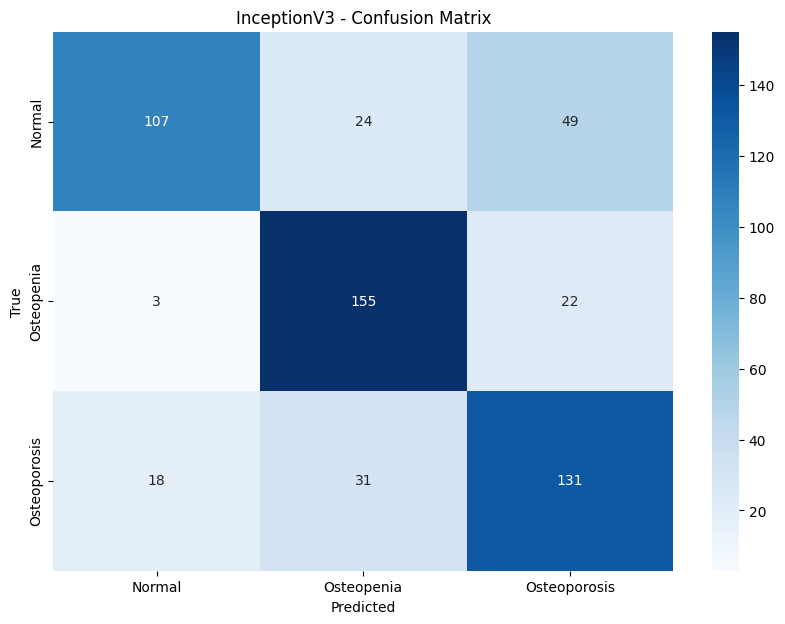

In [3]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.6),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=100,
    callbacks=[early_stopping, reduce_lr]
)

model.save("/content/InceptionV3_KneeOsteo_DeepModel.keras")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('InceptionV3 - Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('InceptionV3 - Accuracy')
plt.show()

test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc:.2f}, Test Loss: {test_loss:.2f}')

y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()

print(classification_report(y_true, y_pred_classes, target_names=list(test_generator.class_indices.keys())))
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('InceptionV3 - Confusion Matrix')
plt.show()


43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 81s 376ms/step - accuracy: 0.3308 - loss: 1.1251 - val_accuracy: 0.3333 - val_loss: 1.0985 - learning_rate: 1.0000e-04
Epoch 2/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step - accuracy: 0.3483 - loss: 1.1025 - val_accuracy: 0.3333 - val_loss: 1.0981 - learning_rate: 1.0000e-04
Epoch 3/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step - accuracy: 0.3336 - loss: 1.0994 - val_accuracy: 0.3333 - val_loss: 1.0984 - learning_rate: 1.0000e-04
Epoch 4/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 11s 93ms/step - accuracy: 0.3295 - loss: 1.1018 - val_accuracy: 0.3657 - val_loss: 1.0976 - learning_rate: 1.0000e-04
Epoch 5/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 11s 95ms/step - accuracy: 0.3425 - loss: 1.1001 - val_accuracy: 0.3491 - val_loss: 1.0978 - learning_rate: 1.0000e-04
Epoch 6/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 14s 115ms/step - accuracy: 0.3393 - loss: 1.0972 - val_accuracy: 0.3583 - val_loss: 1.0979 - learning_rate: 1.00

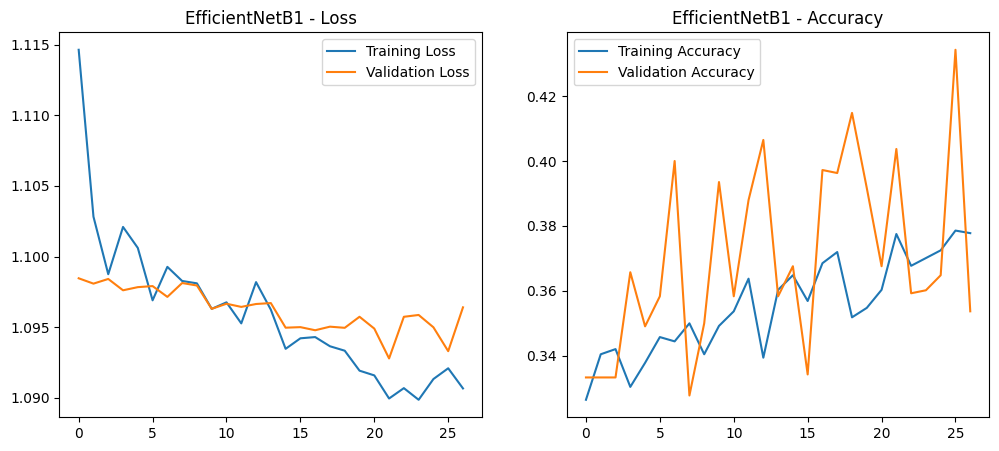

17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 578ms/step - accuracy: 0.1988 - loss: 1.0877
Test Accuracy: 0.44, Test Loss: 1.08
17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 590ms/step
              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00       180
  Osteopenia       0.52      0.54      0.53       180
Osteoporosis       0.39      0.77      0.52       180

    accuracy                           0.44       540
   macro avg       0.31      0.44      0.35       540
weighted avg       0.31      0.44      0.35       540



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


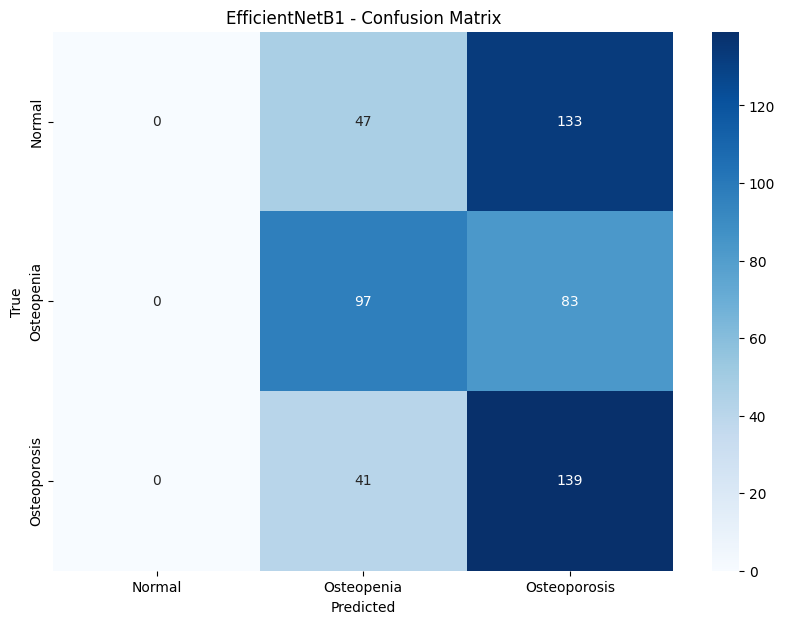

In [5]:
from tensorflow.keras.applications import EfficientNetB3, EfficientNetB1, EfficientNetB2
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
# -------------------- EfficientNetB1 Model --------------------
base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.6),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=100,
    callbacks=[early_stopping, reduce_lr]
)

model.save("/content/EfficientNetB3_KneeOsteo_DeepModel.keras")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('EfficientNetB1 - Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('EfficientNetB1 - Accuracy')
plt.show()

test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc:.2f}, Test Loss: {test_loss:.2f}')

y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()

print(classification_report(y_true, y_pred_classes, target_names=list(test_generator.class_indices.keys())))
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('EfficientNetB1 - Confusion Matrix')
plt.show()
